Début du projet : 

In [257]:
%matplotlib inline     
# ^Sans animations
# %matplotlib notebook 
# ^Avec animations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import random
#from random import * 

On commence par faire des dictionnaires sur les probabilités de décès et de descendance en fonction de la décennie.

In [258]:
# Dictionnaire représentant la distribution de probabilité des descendants.
# clef = nombre de descendants et valeur = probabilité

p0 = {0 : 1.0}

p10 = {0 : 1.0}

p20 = {0 : 0.7,
     1 : 0.2,
     2 : 0.1}

p30 = {0 : 0.5,
     1 : 0.35,
     2 : 0.15}

p40 = {0 : 0.75,
     1 : 0.15,
     2 : 0.1}

p50 = {0 : 0.9,
     1 : 0.1}

p60 = {0 : 1.0}

p70 = {0 : 1.0}

p80 = {0 : 1.0}

p90 = {0 : 1.0}

p = {0 : p0,
    10 : p10,
    20 : p20,
    30 : p30,
    40 : p40,
    50 : p50,
    60 : p60,
    70 : p70,
    80 : p80,
    90 : p90}

In [259]:
def number_of_descendants(p, a):
    '''
    dict[int:dict[int:float]]*int->int
    Étant donnée une distibution de probabilité 'p', et un age, la fonction retourne le nombre de descendants d'un individu.
    '''
    u = np.random.random()
    s = 0
    pb = p[a]
    for k in pb.keys():
        s += pb[k]
        if u < s:
            return k
        
number_of_descendants(p, 30)

0

 On teste cette fonction pour verifier la cohérence des dictionnaires de proba.

In [292]:
def number_of_descendants_in_a_life_time(p):
    '''
    dict[int:dict[int:float]]->int
    nombre de minots sur une vie
    '''
    a = 0
    nb_de_m = 0
    while a <= 90:
        nb_de_m += number_of_descendants(p, a)
        a += 10
    return nb_de_m


number_of_descendants_in_a_life_time(p)

1

On créé le dictionnaire initial de la population

In [261]:
pop_init = {0 : 0,
    10 : 0,
    20 : 50,
    30 : 50,
    40 : 10,
    50 : 5,
    60 : 0,
    70 : 0,
    80 : 0,
    90 : 0}

Fonction qui donne le nombre total de naissances en fonction du dictionnaire de population

In [262]:
def nb_naissances(p1, p2):
    '''
    dict[int:int] * dict[int:dict[int:float]] -> int
    renvoie le nombre de naissances pendant 10 ans
    '''
    a = 0
    nv_enfant = 0
    for a in p1:
        b = p1[a]
        i = 0
        while i < b:
            nv_enfant += number_of_descendants(p2, a)
            i += 1
    return nv_enfant 

nb_naissances(pop_init,p)     

47

On met ensuite à jours le dictionnaire de population

on fait l'hypothèse qu'au dessus de 99 ans, on meurt

In [263]:
def pop_decade(pop,p):
    '''
    dict[int:int] * dict[int:dict[int:float]] -> dict[int:int]
    renvoie le dict de population apres une decade (lire avec l'accent svp)
    '''
    nv_enfant = nb_naissances(pop, p)
    pop_ev = {}
    i = 0
    while i < 90:
        pop_ev[(i + 10)] = pop[i]
        i += 10
        
    pop_ev[0] = nv_enfant
    
    return pop_ev
    

pop_decade(pop_init,p)
    

{0: 49, 10: 0, 20: 0, 30: 50, 40: 50, 50: 10, 60: 5, 70: 0, 80: 0, 90: 0}

On introduit ensuite à l'aide d'un dictionnaire les probabilités de mortalités.

In [264]:
# Dictionnaire représentant la distribution de probabilité de mourir.
# clef = age et valeur = probabilité

pmort = {0 : 0.1,
    10 : 0.02,
    20 : 0.02,
    30 : 0.05,
    40 : 0.08,
    50 : 0.09,
    60 : 0.12,
    70 : 0.15,
    80 : 0.30,
    90 : 1.0}

Puis on fait une fonction plata_o_plomo qui donne avec le dictionnaire précédent si un indivudu est mort ou pas. 

In [265]:
def plata_o_plomo(pmort, age):
    '''
    dict[int:float]*int->int
    renvoie 0 si vivant et 1 si mort
    '''
    u = np.random.random()
    if u < pmort[age]:
            return 1
    else :
        return 0
plata_o_plomo(pmort,30)

0

Puis on créé une fonction qui va nous donner le nombre de mort pour une generation (decade)

In [266]:
def mort_gen(pmort, nb_gen, age):
    '''
    dict[int:float]*int*int->int
    Renvoie le nombre de mort d'une generation 
    '''
    i = 0
    morts = 0
    while i < nb_gen:
        morts += plata_o_plomo(pmort, age)
        i += 1
    return morts

mort_gen(pmort, 50, 30)    

4

On fait ensuite passer l'ensemble des générations de la population dans la fonction pour avoir le nombre de gens en vie à la decade suivante (toujours avec l'accent svp)

In [267]:
def pop_vivante(pmort, pop):
    '''
    dict[int:float]*dict[int:int]->dict[int:int]
    Renvoie la population moins les morts
    '''
    
    pop_ev_ok = {}
    i = 0
    for i in pop :
        pop_ev_ok[i] = pop[i] - mort_gen(pmort, pop[i], i)
    return pop_ev_ok

pop_vivante(pmort, pop_init)

{0: 0, 10: 0, 20: 50, 30: 48, 40: 8, 50: 5, 60: 0, 70: 0, 80: 0, 90: 0}

On écrit ensuite la fonction finale qui nous donne après 10 ans la population (naissance puis mort).

In [268]:
def pop_next(pop, p, pmort):
    """
    dict[int:int] * dict[int:dict[int:float]] * dict[int:float] -> dict[int:int]
    renvoie la population a la génération suivante
    """
    popnext = pop_decade(pop, p)
    popnext = pop_vivante(pmort, popnext)
    
    return popnext

print("Population à la génération suivante")
pop_next(pop_init, p, pmort)

Population à la génération suivante


{0: 54, 10: 0, 20: 0, 30: 44, 40: 46, 50: 9, 60: 4, 70: 0, 80: 0, 90: 0}

On introduit ensuite une fonction pour avoir la population Pop après une nombre de decade d.

In [269]:
def pop_after_d(pop, p , pmort, d):
    """
    dict[int:int]*dict[int:dict[int:float]]*dict[int:float]*int->dict[int:int]
    Renvoie la population à la decade d
    """
    for i in range(d):
        print("Année = ", ((i + 1)*10))
        pop = pop_next(pop, p, pmort)
        pop_totale = 0
        j = 0
        while j <= 90 : 
            print("age =", j,", Population = ",pop[j])
            pop_totale = pop_totale + pop[j]
            j = j + 10
        print("Population totale = ", pop_totale)
        print(" ")
    return pop

print("Population à la decade d")
pop_after_d(pop_init, p, pmort, 20)

Population à la decade d
Année =  10
age = 0 , Population =  53
age = 10 , Population =  0
age = 20 , Population =  0
age = 30 , Population =  47
age = 40 , Population =  45
age = 50 , Population =  8
age = 60 , Population =  5
age = 70 , Population =  0
age = 80 , Population =  0
age = 90 , Population =  0
Population totale =  158
 
Année =  20
age = 0 , Population =  38
age = 10 , Population =  52
age = 20 , Population =  0
age = 30 , Population =  0
age = 40 , Population =  43
age = 50 , Population =  38
age = 60 , Population =  8
age = 70 , Population =  5
age = 80 , Population =  0
age = 90 , Population =  0
Population totale =  184
 
Année =  30
age = 0 , Population =  12
age = 10 , Population =  36
age = 20 , Population =  52
age = 30 , Population =  0
age = 40 , Population =  0
age = 50 , Population =  41
age = 60 , Population =  34
age = 70 , Population =  8
age = 80 , Population =  3
age = 90 , Population =  0
Population totale =  186
 
Année =  40
age = 0 , Population =  16


{0: 43, 10: 36, 20: 49, 30: 35, 40: 28, 50: 30, 60: 29, 70: 23, 80: 11, 90: 0}

Fonction pour savoir ou bout de combien de decade on arrive à une pop totale n

In [270]:
def nb_of_decade(pop, p , pmort, n):
    """
    dict[int:int] * dict[int:dict[int:float]] * dict[int:float] * int -> tuple[str, int,  str, int]
    Renvoie decade ou pop > n
    """
    d = 0
    pop_totale = 0
    while pop_totale < n :
        d = d + 1
        pop = pop_next(pop, p, pmort)
        j = 0
        pop_totale = 0
        while j <= 90 :
            pop_totale = pop_totale + pop[j]
            j = j + 10
    return ("Année = ", (d*10), "Population = ", pop_totale)
nb_of_decade(pop_init, p, pmort, 10000)

('Année = ', 910, 'Population = ', 10053)

On va ensuite essayer de complexifier un peu notre modèle en prenant en compte le sexe des colons.

In [271]:
#On va donc créer des dictionnaires en bal
pop_h = {0 : 0,
    10 : 0,
    20 : 25,
    30 : 25,
    40 : 5,
    50 : 2,
    60 : 0,
    70 : 0,
    80 : 0,
    90 : 0}


pop_f = {0 : 0,
    10 : 0,
    20 : 25,
    30 : 25,
    40 : 5,
    50 : 3,
    60 : 0,
    70 : 0,
    80 : 0,
    90 : 0}

Pop_totale = {1 : pop_h,
              2 : pop_f}


On part du principe qu'il faut un homme et une femme pour faire des enfants.

In [272]:
pop_h.get(20)

25

In [273]:
def compte_couple(Pop_totale):
    
    age_couple = dict()
    
    poph = Pop_totale[1]
    popf = Pop_totale[2]
    i = 0
    while i <= 90 :
        age_couple[i] = min(poph[i], popf[i])
        i = i + 10
    return age_couple
compte_couple(Pop_totale)
    

{0: 0, 10: 0, 20: 25, 30: 25, 40: 5, 50: 2, 60: 0, 70: 0, 80: 0, 90: 0}

In [274]:
age_couple = {0: 0, 10: 0, 20: 25, 30: 25, 40: 5, 50: 2, 60: 0, 70: 0, 80: 0, 90: 0}

On fait maintenant la fonction qui nous donne la descendance d'un couple sur une decade.

In [275]:
def nb_enfant_couple_decade(ageh, agef, p):

    u = np.random.random()
    s = 0
    pb = p[a]
    for k in pb.keys():
        s += pb[k]
        if u < s:
            return k

Nombre de naissance en fonction du nombre de couple.

In [276]:
def nb_naissances_couples(p1, p2):
    '''
    dict[int:int] * dict[int:dict[int:float]] -> int
    renvoie le nombre de naissances pendant 10 ans
    '''
    a = 0
    nv_enfant = 0
    for a in p1:
        b = p1[a]
        i = 0
        while i < b:
            nv_enfant += number_of_descendants(p2, a)
            i += 1
    return nv_enfant 

nb_naissances_couples(age_couple,p)

37

on "tri" pour savoir combien de garçons et de filles sont nés

In [277]:
def tri_naissance(nb_enfant):
    
    nb_enfant_h = 0
    nb_enfant_f = 0
    for i in range(0, nb_enfant):
        a = random.randint(1, 2)
        if a == 1:
            nb_enfant_h = nb_enfant_h + 1
        else :
            nb_enfant_f = nb_enfant_f + 1
    return {1 : nb_enfant_h, 2 : nb_enfant_f}
    
    
tri_naissance(50)

{1: 24, 2: 26}

On améliorer les anciennes fcts.

In [278]:
def pop_decade_couple(Pop_totale,p):
    '''
    dict[int:int] * dict[int:dict[int:float]] -> dict[int:dict[int:int]]
    renvoie le dict de population apres une decade (lire avec l'accent svp)
    '''
    nb_couple = compte_couple(Pop_totale)
    nv_enfant = nb_naissances_couples(nb_couple, p)
    tri = tri_naissance(nv_enfant)
    popho = Pop_totale[1]
    popfe = Pop_totale[2]
    poph_ev = dict()
    popf_ev = dict()
    i = 0
    while i < 90:
        
        poph_ev[(i + 10)] = popho[i]
        popf_ev[(i + 10)] = popfe[i]
        i += 10
        
    poph_ev[0] = tri[1]
    popf_ev[0] = tri[2]
    
    pop_ev = {1 : poph_ev, 2 : popf_ev}
    
    return pop_ev
    

pop_decade_couple(Pop_totale,p)

{1: {0: 6, 10: 0, 20: 0, 30: 25, 40: 25, 50: 5, 60: 2, 70: 0, 80: 0, 90: 0},
 2: {0: 12, 10: 0, 20: 0, 30: 25, 40: 25, 50: 5, 60: 3, 70: 0, 80: 0, 90: 0}}

Graphique :

In [279]:
def extract(pop_dic, key=1):
    age = []
    qte = []
    
    for k, v in pop_dic[key].items():
        age.append(k)
        qte.append(v)
    
    return age, qte

l, v = extract(Pop_totale)


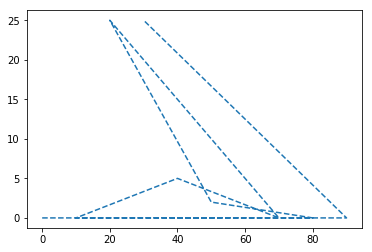

In [280]:
plt.plot(l, v, "--")

[[10, 0, 0, 25, 25, 5, 2, 0, 0, 0], [12, 10, 0, 0, 25, 25, 5, 2, 0, 0], [4, 12, 10, 0, 0, 25, 25, 5, 2, 0], [1, 4, 12, 10, 0, 0, 25, 25, 5, 2], [6, 1, 4, 12, 10, 0, 0, 25, 25, 5], [4, 6, 1, 4, 12, 10, 0, 0, 25, 25], [7, 4, 6, 1, 4, 12, 10, 0, 0, 25], [2, 7, 4, 6, 1, 4, 12, 10, 0, 0], [1, 2, 7, 4, 6, 1, 4, 12, 10, 0], [2, 1, 2, 7, 4, 6, 1, 4, 12, 10], [2, 2, 1, 2, 7, 4, 6, 1, 4, 12], [1, 2, 2, 1, 2, 7, 4, 6, 1, 4], [0, 1, 2, 2, 1, 2, 7, 4, 6, 1], [0, 0, 1, 2, 2, 1, 2, 7, 4, 6], [0, 0, 0, 1, 2, 2, 1, 2, 7, 4]]


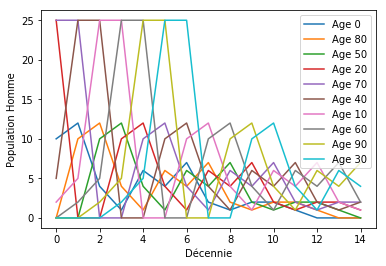

In [295]:
def liste_pop_decade_couple(Pop_totale,p, n):
    
    L2 = []
    pop_ev = Pop_totale
    for i in range (0, n):
        l2 = []
        pop_ev = pop_decade_couple(pop_ev,p)
        o = pop_ev[1]
        for u in range (0, 100, 10):
            l2.append(o[u])
            
        
        
        L2.append(l2)
        l2 = []
    print(L2)
    return L2

L2 = liste_pop_decade_couple(Pop_totale,p, 15)

def plot_2(L2):
    plt.figure()
    plt.plot(L2)
    plt.legend(["Age " + str(i) for i in p])
    plt.xlabel("Décennie")
    plt.ylabel("Population Homme")
    plt.show()
    return
plot_2(L2)



Fonction suivante :

In [282]:
def pop_vivante_couple(pmort, pop1):
    '''
    dict[int:float] * dict[int:dict[int:int] -> dict[int:int]
    Renvoie la population moins les morts
    '''
    poph_n = []
    poph_n = pop1[1]
    popf_n = pop1[2]
    pop = dict()
    pop_ev_ok = {}
    u = 0
    while u < 100:
        pop[u] = (poph_n[u] + popf_n[u])
        u = u + 10
    i = 0
    for i in pop :
        pop_ev_ok[i] = pop[i] - mort_gen(pmort, pop[i], i)
    return pop_ev_ok

pop_vivante_couple(pmort, Pop_totale)

{0: 0, 10: 0, 20: 50, 30: 48, 40: 10, 50: 4, 60: 0, 70: 0, 80: 0, 90: 0}

In [283]:
from tkinter import *

fene = Tk()
fene.title("Simulation Mars")
fond = Canvas(fene, width='400', height='400', bg="black")
fond.pack()


def vie():

    fond1 = Canvas(fond, width='400', height='400', bg="black")
    fond1.pack()

    colors = ["blue","green","purple","white","yellow","grey","orange","pink","black"]
    #color = ["blue","black"]

    
    
    D = []
    for i in range(20):
        for j in range(20):
            fond.create_rectangle(i*20,j*20, 20+i*20, 20+j*20, fill = colors[random.randint(0,8)])
            D.append(random.randint(0,1))

    fond1.destroy()        
    fene.after(50,vie)
            
vie()
fene.mainloop()

/*--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------*/

In [284]:
#fonction ressources

In [285]:
def ressource_terre(ini,x,n):
    """int**3->int
    retourne le taux de ressource envoyé de la terre en fonction de decade n en fonction de ini et x"""
    t=0
    while t<=n+1:    
        ini=ini+x*t
        t=t+10
    return ini

In [286]:
#taux de ressources necessaire
coefress=0.002   #coef de la fonction affine
resini=0.9#taux de ressource initial envoyé de la terre
d=5  #decade
dmax=20
rTerre=ressource_terre(resini,coefress,d)     #ressources provenant de la terre 
rPlanet=0   #ressources récolté sur place

coef=1          #coefficient

In [287]:
def impact_ressources(t,dpm):
        """float**2*dict[int:float]->dict[int:float]
        retourne le dictionnaire pmort avec l'impact des ressources"""
        j=10
        while j <= 90 : 
            dpm[j]= round(dpm[j]*t,3)
            j=j+10
        return dpm

impact_ressources(ressource_terre(resini,coefress,10),pmort)
        
        

{0: 0.1,
 10: 0.018,
 20: 0.018,
 30: 0.046,
 40: 0.074,
 50: 0.083,
 60: 0.11,
 70: 0.138,
 80: 0.276,
 90: 0.92}

In [290]:
def impact_ressources_decade(t,nmax,dpm):
    """int**3*dict[int:float]
    retourne le dictionnaire pmort avec l'impact des ressources en fonction des decades
    avec n la decade max"""
    i=0
    while i<=nmax:
        print("decade =",i)
        a = impact_ressources(ressource_terre(resini,coefress,i),pmort)
        print(a)
        i=i+1
    return
impact_ressources_decade(ressource_terre(resini,coefress,1),dmax,pmort)
impact_ressources(ressource_terre(resini,coefress,1),pmort)

decade = 0
{0: 0.1, 80: 0.034, 50: 0.011, 20: 0.005, 70: 0.018, 40: 0.01, 10: 0.005, 60: 0.013, 90: 0.116, 30: 0.006}
decade = 1
{0: 0.1, 80: 0.031, 50: 0.01, 20: 0.005, 70: 0.016, 40: 0.009, 10: 0.005, 60: 0.012, 90: 0.104, 30: 0.005}
decade = 2
{0: 0.1, 80: 0.028, 50: 0.009, 20: 0.005, 70: 0.014, 40: 0.008, 10: 0.005, 60: 0.011, 90: 0.094, 30: 0.005}
decade = 3
{0: 0.1, 80: 0.025, 50: 0.008, 20: 0.005, 70: 0.013, 40: 0.007, 10: 0.005, 60: 0.01, 90: 0.085, 30: 0.005}
decade = 4
{0: 0.1, 80: 0.023, 50: 0.007, 20: 0.005, 70: 0.012, 40: 0.006, 10: 0.005, 60: 0.009, 90: 0.077, 30: 0.005}
decade = 5
{0: 0.1, 80: 0.021, 50: 0.006, 20: 0.005, 70: 0.011, 40: 0.005, 10: 0.005, 60: 0.008, 90: 0.069, 30: 0.005}
decade = 6
{0: 0.1, 80: 0.019, 50: 0.005, 20: 0.005, 70: 0.01, 40: 0.005, 10: 0.005, 60: 0.007, 90: 0.062, 30: 0.005}
decade = 7
{0: 0.1, 80: 0.017, 50: 0.005, 20: 0.005, 70: 0.009, 40: 0.005, 10: 0.005, 60: 0.006, 90: 0.056, 30: 0.005}
decade = 8
{0: 0.1, 80: 0.015, 50: 0.005, 20: 0.005,

{0: 0.1,
 10: 0.005,
 20: 0.005,
 30: 0.005,
 40: 0.005,
 50: 0.005,
 60: 0.005,
 70: 0.006,
 80: 0.006,
 90: 0.019}